In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('threads_std_2.csv') 
# print(df.groupby(['total_log_yes (in us)','num_log_yes']).mean().reset_index())

COMMIT_ALG             ONE_PC      TWO_PC
NUM_SERVER_THREADS                       
2                    63.57054   50.489425
4                   119.67650   99.380125
8                   232.95425  176.440250
16                  471.32150  350.427750
32                  752.62550  638.428000
64                  478.43600  385.860000
128                 255.68550  246.401500


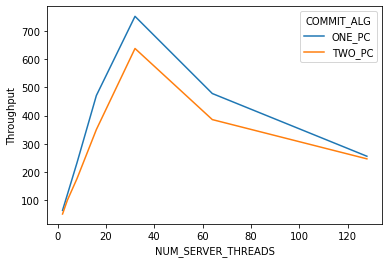

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'NUM_SERVER_THREADS'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='NUM_SERVER_THREADS', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
fig = plot.get_figure()
fig.savefig("threads_zipf0_std.png")


In [3]:
latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'total_log_yes (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 16]

<ipython-input-3-4036db876ca6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase (in us)', 'total_log_yes (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


   COMMIT_ALG  NUM_SERVER_THREADS  execute_phase (in us)  \
3      ONE_PC                  16              274.13900   
10     TWO_PC                  16              247.15275   

    prepare_phase (in us)  total_log_yes (in us)  commit_phase (in us)  \
3                24561.05              21832.575               1.19115   
10               24392.70              21231.325            8957.18500   

    abort (in us)  
3               0  
10              0  


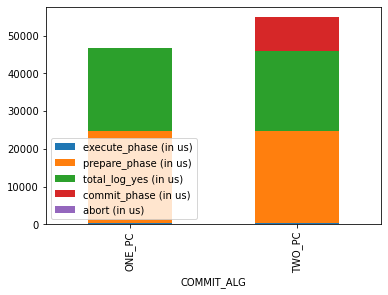

In [4]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_zipf09_std.png")